# Packages

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

# Data

In [2]:
df = pd.read_csv("data_dm3.csv")

In [3]:
df_shape = df.shape

In [4]:
print("number of sample : ", df_shape[0])
print("number of variable : ", df_shape[1])

number of sample :  441
number of variable :  211


# 1. Target and Features

In [5]:
df.head()

,-1.298173374733184726e+00,-1.622490637183908735e-01,1.223379369153350549e+00,1.355554339582927481e+00,1.080170627962381058e+00,6.349793274139390320e-01,2.987410831264468158e-01,5.482702692046558246e-01,7.317733641828934044e-01,1.018645435297013568e+00,...,5.882777992748500218e-01,2.101056224387073124e-01,1.861458271316984936e+00,-4.363994858971800839e-01,2.792989402465480553e-01,-1.416019733199122221e+00,-2.332362908037092009e+00,2.150961139501001429e-01,-6.933193671119128876e-01,1.510000000000000000e+02
0,0.166951,-0.338060,-0.618867,0.759366,1.134281,-0.536844,-0.075120,0.970251,-0.327487,0.717310,...,-0.251054,-0.825716,0.339139,1.119430,0.225958,-0.822288,0.382838,-0.718829,-0.188993,75.0
1,-0.416177,-0.205659,-1.282226,1.675500,1.523746,0.192029,-0.235840,-1.954626,-0.853309,0.892791,...,1.283837,0.372516,-0.652557,-2.579347,0.139267,-1.901196,0.048210,0.220205,0.471588,141.0
2,0.867184,-0.398667,0.093501,0.025971,1.852099,0.789774,0.801775,0.376711,0.853689,0.247953,...,0.446582,0.334733,0.399074,-0.884172,0.723819,1.316367,0.088218,0.619496,1.061662,206.0
3,1.193282,-0.936980,-0.725039,0.766078,0.223489,-1.584622,1.146866,0.086136,-0.088780,-0.945066,...,0.786157,-1.058179,-0.155788,-0.642504,2.040010,-1.703110,-1.901502,1.778811,-0.489853,135.0
4,1.513286,0.072830,1.243039,-0.368609,-0.564998,-1.736720,-0.441544,-1.395122,-1.550146,0.941235,...,0.767162,0.417754,-1.010548,1.397951,0.074975,1.381528,-1.367316,1.200057,-0.292088,97.0


In [6]:
print(df.iloc[0, 1]) # First row, second column
print(df.iloc[:, 0]) 

-0.33806045468817714
0      0.166951
1     -0.416177
2      0.867184
3      1.193282
4      1.513286
         ...   
436   -0.270323
437    0.872196
438   -0.032586
439   -1.529754
440    0.942724
Name: -1.298173374733184726e+00, Length: 441, dtype: float64


In [7]:
Y = df.iloc[:, -1]
Y

0       75.0
1      141.0
2      206.0
3      135.0
4       97.0
       ...  
436    178.0
437    104.0
438    132.0
439    220.0
440     57.0
Name: 1.510000000000000000e+02, Length: 441, dtype: float64

In [8]:
X = df.drop("1.510000000000000000e+02", axis=1)

In [9]:
X

,-1.298173374733184726e+00,-1.622490637183908735e-01,1.223379369153350549e+00,1.355554339582927481e+00,1.080170627962381058e+00,6.349793274139390320e-01,2.987410831264468158e-01,5.482702692046558246e-01,7.317733641828934044e-01,1.018645435297013568e+00,...,9.375461820781528788e-01,5.882777992748500218e-01,2.101056224387073124e-01,1.861458271316984936e+00,-4.363994858971800839e-01,2.792989402465480553e-01,-1.416019733199122221e+00,-2.332362908037092009e+00,2.150961139501001429e-01,-6.933193671119128876e-01
0,0.166951,-0.338060,-0.618867,0.759366,1.134281,-0.536844,-0.075120,0.970251,-0.327487,0.717310,...,0.940726,-0.251054,-0.825716,0.339139,1.119430,0.225958,-0.822288,0.382838,-0.718829,-0.188993
1,-0.416177,-0.205659,-1.282226,1.675500,1.523746,0.192029,-0.235840,-1.954626,-0.853309,0.892791,...,0.338998,1.283837,0.372516,-0.652557,-2.579347,0.139267,-1.901196,0.048210,0.220205,0.471588
2,0.867184,-0.398667,0.093501,0.025971,1.852099,0.789774,0.801775,0.376711,0.853689,0.247953,...,0.733290,0.446582,0.334733,0.399074,-0.884172,0.723819,1.316367,0.088218,0.619496,1.061662
3,1.193282,-0.936980,-0.725039,0.766078,0.223489,-1.584622,1.146866,0.086136,-0.088780,-0.945066,...,-0.714867,0.786157,-1.058179,-0.155788,-0.642504,2.040010,-1.703110,-1.901502,1.778811,-0.489853
4,1.513286,0.072830,1.243039,-0.368609,-0.564998,-1.736720,-0.441544,-1.395122,-1.550146,0.941235,...,0.200635,0.767162,0.417754,-1.010548,1.397951,0.074975,1.381528,-1.367316,1.200057,-0.292088
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
436,-0.270323,-0.437638,0.347423,-0.123436,0.344168,-0.777434,-1.380455,0.491346,0.713854,-0.693186,...,1.226587,-0.051364,-0.371945,-0.114830,0.153832,-0.973347,-0.997793,0.158006,-0.139519,1.010518
437,0.872196,0.975497,0.819331,-0.975557,-0.968388,1.029983,-0.079420,-0.130714,0.201144,-2.390860,...,-1.709679,-0.327924,0.350886,-0.305686,-1.292688,0.124676,1.465920,0.663206,1.278693,0.419890
438,-0.032586,-0.571893,0.806842,0.562865,1.194239,-0.345469,0.717316,0.234458,1.546961,0.554013,...,1.073312,-1.467585,0.584516,-0.281854,-0.618165,0.840381,1.261452,-0.084541,0.301755,0.517624
439,-1.529754,0.756967,2.251588,-0.052600,0.502047,0.046229,-1.571494,0.238793,-1.211869,-0.896148,...,-0.976340,-0.000023,-2.231379,-0.880398,0.267481,1.036171,-0.962587,0.491072,-1.389069,0.473725


# 2. Nature des variables

# X : Centrée et réduite? 

In [10]:
for K in X : 
    mean_X = X.mean()

In [11]:
mean_X

-1.298173374733184726e+00    0.002944
-1.622490637183908735e-01    0.000368
1.223379369153350549e+00    -0.002774
1.355554339582927481e+00    -0.003074
1.080170627962381058e+00    -0.002449
                               ...   
2.792989402465480553e-01    -0.000633
-1.416019733199122221e+00    0.003211
-2.332362908037092009e+00    0.005289
2.150961139501001429e-01    -0.000488
-6.933193671119128876e-01    0.001572
Length: 210, dtype: float64

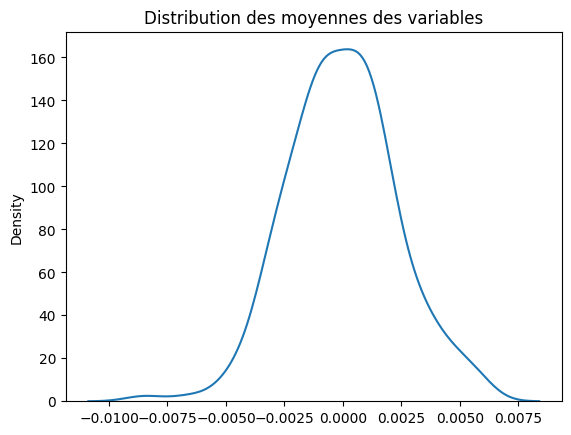

In [12]:
plt.figure()
sns.kdeplot(mean_X)
plt.title("Distribution des moyennes des variables")
plt.show()

Ils sont tous proche de 0, ce qui signifie que les variables ont été centré et réduite (avec la modification de l'écart type aussi). 

## Y : Centrée et réduite?

In [13]:
Y_mean = np.mean(Y)
Y_std = np.std(Y)
Y_mean, Y_std

(np.float64(152.1360544217687), np.float64(77.0929855951229))

Non, la variable n'est pas centrée et réduite. La moyenne est égale à 152 qui est très loin de 0.

## Scatterplot de 04 features prises au hasard

In [14]:
X_arrays = X.to_numpy()
X_arrays.ndim

2

In [15]:
df_sub = pd.DataFrame(X_arrays[:,np.random.choice(range(210),4)])
df_sub['y'] = Y

In [16]:
df_sub

,0,1,2,3,y
0,-1.184883,0.416919,0.764859,-0.327487,75.0
1,-0.146070,-0.602362,1.171837,-0.853309,141.0
2,0.642887,-0.601579,-1.110908,0.853689,206.0
3,-0.592236,-0.707776,1.043799,-0.088780,135.0
4,0.943049,-0.836393,0.538100,-1.550146,97.0
...,...,...,...,...,...
436,-0.144568,0.411946,0.326000,0.713854,178.0
437,-0.808646,-0.186747,1.786444,0.201144,104.0
438,-0.201157,-0.229695,0.242865,1.546961,132.0
439,-0.687423,-0.107604,1.686422,-1.211869,220.0


<Figure size 640x480 with 0 Axes>

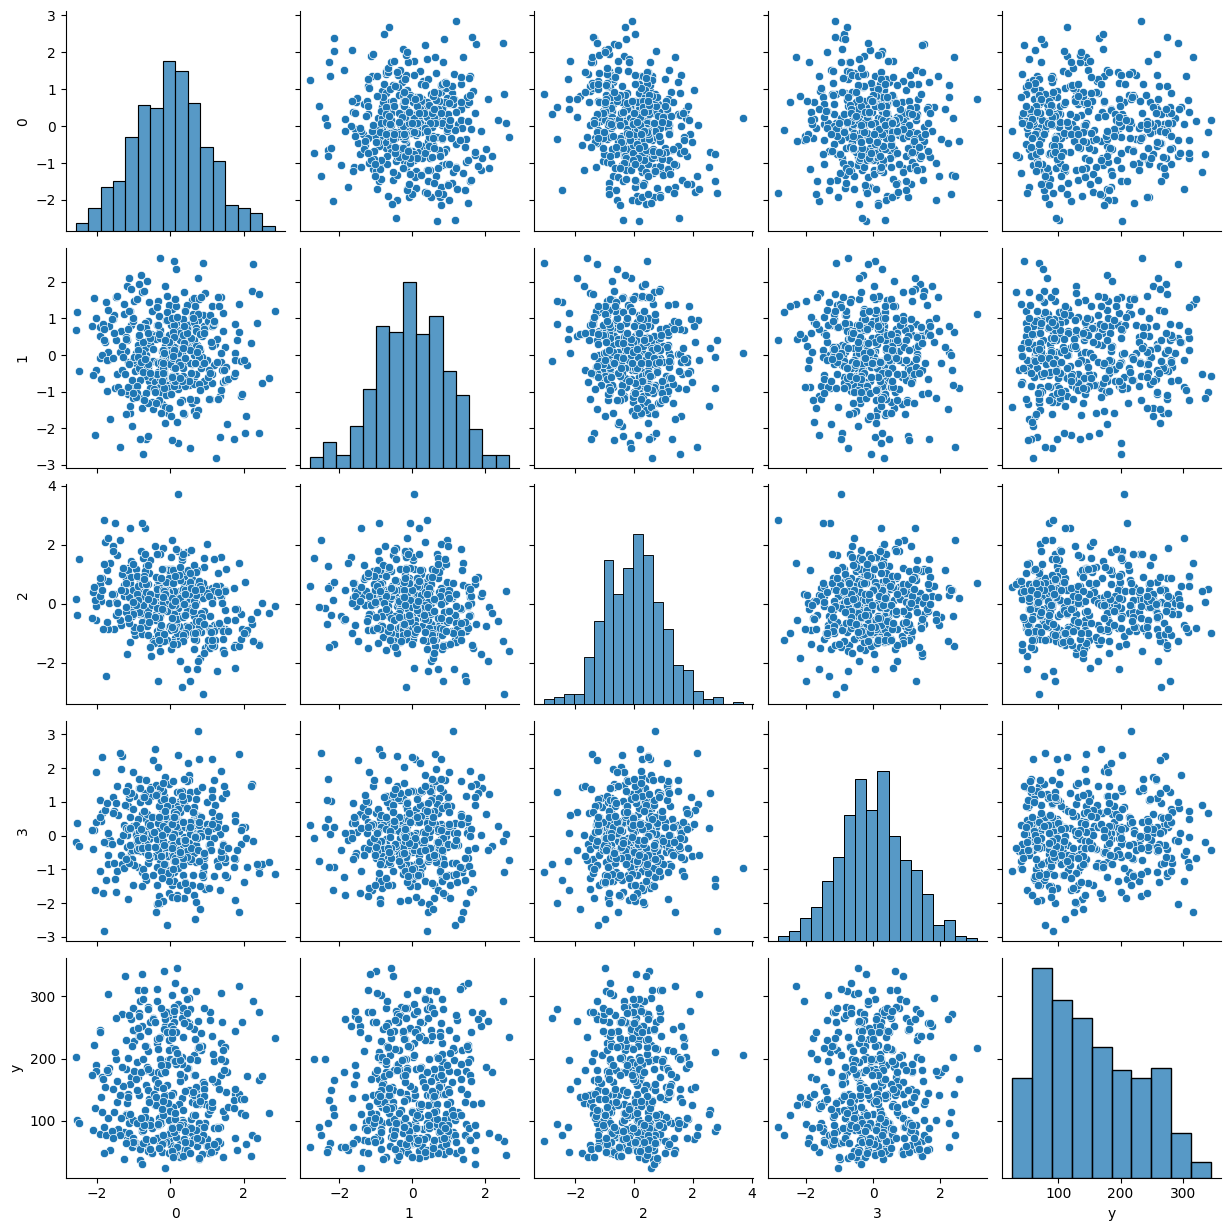

In [17]:
plt.figure()
sns.pairplot(df_sub)
plt.show()

Commentaire attendu : Les covariables séléctionées semblent peu corrélées entre elle. Elles sont aussi peu corrélées avec la variable explicative.

# 3. Split des données

In [18]:
df = pd.DataFrame(X_arrays)
df["y"] = Y

In [32]:
X_train, X_test, y_train, y_test = train_test_split(df.drop("y", axis = 1), df["y"], 
                                                    test_size = 0.2,
                                                    random_state = 42) 

In [33]:
print("taille des features d'entrainement :", X_train.shape)
print("taille des features de test :", X_test.shape)

taille des features d'entrainement : (352, 210)
taille des features de test : (89, 210)


# 4. Aanalyse du mérite de l'ACP

In [34]:
# Calcul de la corrélation
correlation = df.corr()
correlation

,0,1,2,3,4,5,6,7,8,9,...,201,202,203,204,205,206,207,208,209,y
0,1.000000,-0.142841,-0.038433,-0.299478,0.142178,0.154380,-0.060206,-0.176593,0.008661,-0.049459,...,-0.056701,0.023967,0.038242,-0.059628,0.002631,-0.113755,-0.023742,0.165791,-0.054128,0.004983
1,-0.142841,1.000000,0.090059,-0.238148,-0.118469,-0.100271,0.147560,-0.121400,0.039992,-0.110895,...,-0.039501,-0.044305,-0.235506,-0.030841,0.077297,0.000327,-0.132592,-0.070764,0.063379,0.026591
2,-0.038433,0.090059,1.000000,-0.191571,0.138219,-0.075532,-0.078111,0.026354,-0.061044,-0.151283,...,-0.001420,0.133824,0.033747,0.006894,0.087826,-0.026189,-0.322055,0.018377,-0.128293,0.071325
3,-0.299478,-0.238148,-0.191571,1.000000,0.008071,-0.075190,0.146230,-0.078261,0.072309,0.017329,...,0.024145,-0.121143,0.123007,-0.018910,-0.213743,0.089385,0.011615,-0.170234,-0.369471,0.029617
4,0.142178,-0.118469,0.138219,0.008071,1.000000,-0.023785,0.004241,0.181304,0.003648,0.120229,...,-0.010886,0.111278,-0.072033,-0.121298,-0.112843,0.046744,-0.019031,0.030130,-0.084355,0.037915
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
206,-0.113755,0.000327,-0.026189,0.089385,0.046744,0.046918,0.038256,-0.037846,-0.094672,0.130943,...,0.009533,-0.026985,-0.064062,0.147294,-0.003732,1.000000,0.089370,0.036239,0.090701,-0.028641
207,-0.023742,-0.132592,-0.322055,0.011615,-0.019031,0.227211,0.095574,-0.241327,-0.186536,0.126785,...,-0.062697,-0.109315,0.128818,0.004507,-0.109087,0.089370,1.000000,-0.133691,0.310285,-0.043555
208,0.165791,-0.070764,0.018377,-0.170234,0.030130,0.066280,0.041495,-0.048971,0.051655,0.114828,...,-0.089811,0.072320,-0.017267,0.064976,0.033414,0.036239,-0.133691,1.000000,0.031205,0.077211
209,-0.054128,0.063379,-0.128293,-0.369471,-0.084355,0.139621,0.016295,0.043029,-0.183251,0.110475,...,0.003369,-0.060691,-0.057615,0.047560,-0.137264,0.090701,0.310285,0.031205,1.000000,-0.058794


<Axes: >

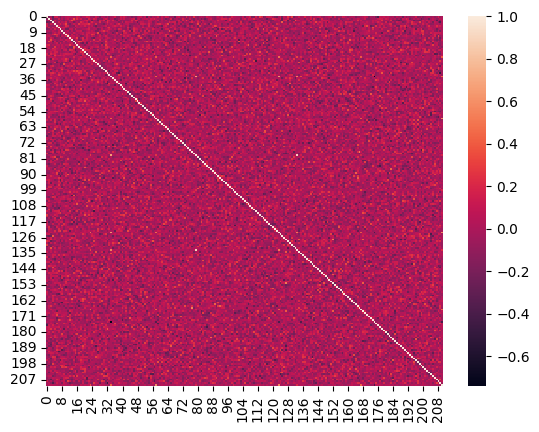

In [22]:
sns.heatmap(correlation)

y moins de corrélations qui sont très visibles. Essayons maintenant d'analyser les valeurs propres 

In [35]:
var = np.cov(np.cov(X,rowvar = False))
U, s, V = np.linalg.svd(var, full_matrices=True)

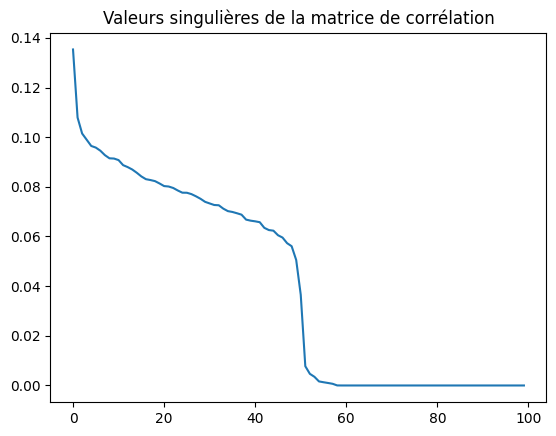

In [36]:
fig = plt.figure()
plt.plot(s[0:100])
plt.title('Valeurs singulières de la matrice de corrélation')
plt.show()

In [37]:
# Voyons où est le décrochage des valeurs propres
s[:53]

array([0.1353145 , 0.10789745, 0.10147151, 0.09896346, 0.09645818,
       0.09580461, 0.09454859, 0.09276072, 0.09148599, 0.09139108,
       0.09076459, 0.08873257, 0.08794812, 0.08697935, 0.08566481,
       0.0841911 , 0.08308306, 0.08273126, 0.08229652, 0.08134785,
       0.08030179, 0.08012688, 0.07953556, 0.07852785, 0.0776447 ,
       0.07761368, 0.07706673, 0.07618138, 0.07517657, 0.07395432,
       0.07331175, 0.0726835 , 0.07257783, 0.07120787, 0.0702191 ,
       0.069877  , 0.06935701, 0.06878751, 0.06679438, 0.0663728 ,
       0.06610507, 0.065752  , 0.06348276, 0.06259055, 0.06234041,
       0.06051199, 0.05956569, 0.05731326, 0.05608554, 0.05054008,
       0.03651513, 0.00775758, 0.00469255])

On remarque que seulement les 51 premières valeurs sont (significativement) différentes de 0. Ceci veut dire que la matrice de design est de rang déficient (51 < 210). Ainsi tenter une statégie de type ''PCA before OLS'' est légitime. On enregistre l'indice de la dernière valeur propre non-nulle.

## 5.Appliquer PCA before OLS 

### OLS without PCA

In [38]:
X_train_denormalized = X_train.apply(
    lambda row: row * row.std() + row.mean(),
    axis=1
)

In [39]:
X_train.head()

,0,1,2,3,4,5,6,7,8,9,...,200,201,202,203,204,205,206,207,208,209
66,0.879232,0.303370,-0.350772,1.868990,-0.109219,0.122256,-1.068038,-1.411830,0.475593,-1.091948,...,-0.402581,0.738857,-0.407567,-0.727863,0.304132,0.776407,1.082213,0.283159,0.560814,-1.542717
353,-0.814476,-0.745403,-0.887853,0.089601,-0.170053,-1.489274,0.334785,0.949797,-0.272302,1.015241,...,0.464175,1.407762,-0.425553,-0.072859,0.815603,0.663912,-0.391238,0.014479,0.175176,-0.319940
239,1.536734,0.934172,0.395600,-0.705882,-0.225117,1.414506,-0.419826,-1.069496,-1.200861,0.697257,...,-0.016711,0.387873,1.412093,0.394205,-0.301616,0.161917,0.760712,-0.098529,0.750198,0.280688
31,0.416886,-0.374295,-0.479028,0.056933,0.861357,0.229321,-1.348351,-1.419347,0.661927,0.643180,...,-0.369809,-1.588171,-0.516271,-2.039875,-0.043423,-0.024158,-0.837229,1.402567,-0.659165,-1.117396
84,-0.527501,0.254828,-0.625339,-0.570039,0.423738,-0.175293,-0.788308,-0.203856,-0.388997,1.334548,...,1.903272,0.958549,-0.286939,0.068878,-1.500781,-0.000025,0.131438,-0.142669,0.703624,1.932504


In [40]:
X_train_denormalized.head()

,0,1,2,3,4,5,6,7,8,9,...,200,201,202,203,204,205,206,207,208,209
66,0.892254,0.366392,-0.230954,1.796075,-0.010374,0.201003,-0.885943,-1.199886,0.523661,-0.907777,...,-0.278265,0.764067,-0.282818,-0.575304,0.367087,0.798357,1.077611,0.347935,0.601483,-1.319408
353,-0.606139,-0.544396,-0.671729,0.201998,-0.030102,-1.209327,0.421163,0.970910,-0.121500,1.029409,...,0.536822,1.380276,-0.258488,0.056778,0.850957,0.715363,-0.227815,0.134847,0.278491,-0.164083
239,1.359093,0.831948,0.360784,-0.602838,-0.182245,1.252164,-0.352585,-0.920942,-1.035865,0.624685,...,0.000077,0.354023,1.250052,0.359563,-0.249170,0.156348,0.680198,-0.071501,0.671000,0.260254
31,0.324877,-0.472419,-0.577961,-0.037858,0.772784,0.135863,-1.454005,-1.525549,0.571812,0.552920,...,-0.467899,-1.695678,-0.615493,-2.150873,-0.138990,-0.119576,-0.938932,1.318177,-0.759491,-1.221265
84,-0.432178,0.364973,-0.531871,-0.475523,0.537084,-0.073298,-0.697927,-0.102401,-0.291050,1.465151,...,2.044651,1.082028,-0.187058,0.175500,-1.423900,0.105292,0.239245,-0.040056,0.822273,2.074436


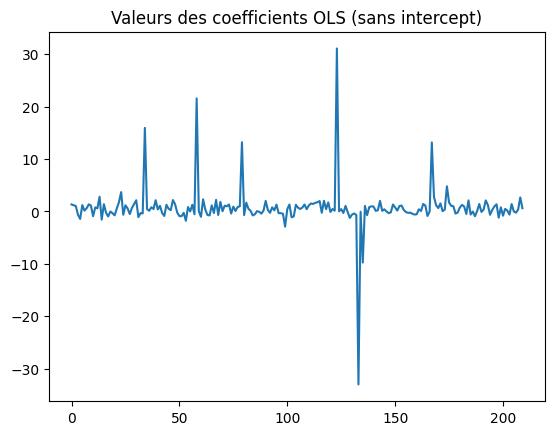

In [43]:
reg = LinearRegression()
reg.fit(X_train_denormalized, y_train)
fig = plt.figure()
plt.plot(reg.coef_)
plt.title('Valeurs des coefficients OLS (sans intercept)')
plt.show()

In [30]:
elbow = 60   #50

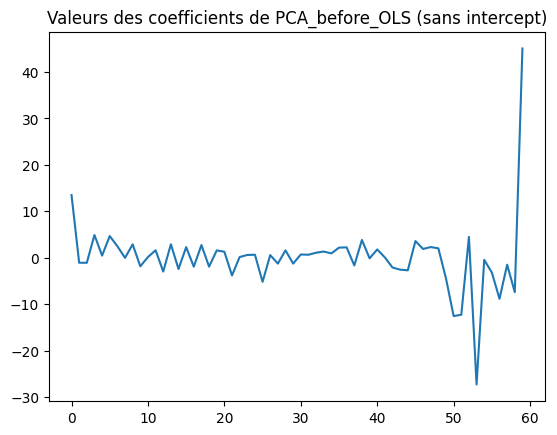

In [45]:
X_train_reduce = np.dot(X_train, U[:,0:elbow])
X_test_reduce = np.dot(X_test, U[:,0:elbow])

regr1 = LinearRegression()
regr1.fit(X_train_reduce , y_train)

fig = plt.figure()
plt.plot(np.r_[regr1.coef_])
plt.title('Valeurs des coefficients de PCA_before_OLS (sans intercept)')
plt.show()